# Analyse Results

Precision = 0.74
Recall = 0.64
F1 = 0.62


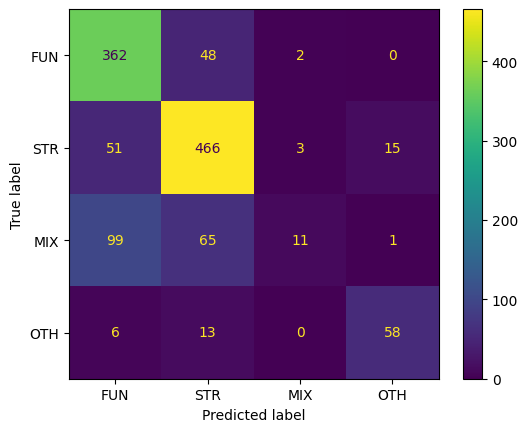

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import json
import ast
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')


# Set file to analyse
file_name = "test_10_3"

# Import data
file_path = f"/home/fantoni/patent-sentence-classification/results/incremental/{file_name}.xlsx"
result_df = pd.read_excel(file_path)

# Set labels
display_labels = ['FUN', 'STR', 'MIX', 'OTH']
true_labels = result_df['sent_tag']  
predicted_labels = result_df['predicted_tag']

# Calculate classification metrics
average = 'macro'
precision = precision_score(true_labels, predicted_labels, average=average, zero_division=0)
recall = recall_score(true_labels, predicted_labels, average=average, zero_division=0)
f1 = f1_score(true_labels, predicted_labels, average=average, zero_division=0)
print(f'Precision = {precision:.2f}')  
print(f'Recall = {recall:.2f}')  
print(f'F1 = {f1:.2f}')  

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=display_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot()
plt.show()

# Compare Incremental

In [45]:
import os
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

folder_path = "/home/fantoni/patent-sentence-classification/results/incremental"
id2num = {'1': 480, '2': 960, '3': 1440, '4': 1920, '5': 2400, '6': 2880, '7': 3360, '8': 3840, '9': 4320, '10': 4800}

results_all = []
for file_name in os.listdir(folder_path):
    if file_name.endswith(".xlsx"):
        sample_id = file_name.split('_')[1]
        #fold = file_name.split('_')[2].replace(".xlsx", "")
        df = pd.read_excel(os.path.join(folder_path, file_name))
        true_labels = df['sent_tag']  
        predicted_labels = df['predicted_tag']

    average = 'macro'
    metrics = {
        'Sample Size': id2num[sample_id],
        'Precision': round(precision_score(true_labels, predicted_labels, average=average, zero_division=0), 3),
        'Recall': round(recall_score(true_labels, predicted_labels, average=average, zero_division=0), 3),
        'F1-Score': round(f1_score(true_labels, predicted_labels, average=average, zero_division=0), 3)
    }
    results_all.append(metrics)

results_df = pd.DataFrame(results_all).sort_values(by='Sample Size')
results_df

,Sample Size,Precision,Recall,F1-Score
0,480,0.539,0.382,0.353
45,480,0.577,0.419,0.425
46,480,0.520,0.461,0.459
63,480,0.530,0.430,0.416
64,480,0.638,0.472,0.476
...,...,...,...,...
94,4800,0.740,0.615,0.605
95,4800,0.775,0.627,0.640
96,4800,0.718,0.690,0.665
97,4800,0.763,0.640,0.669


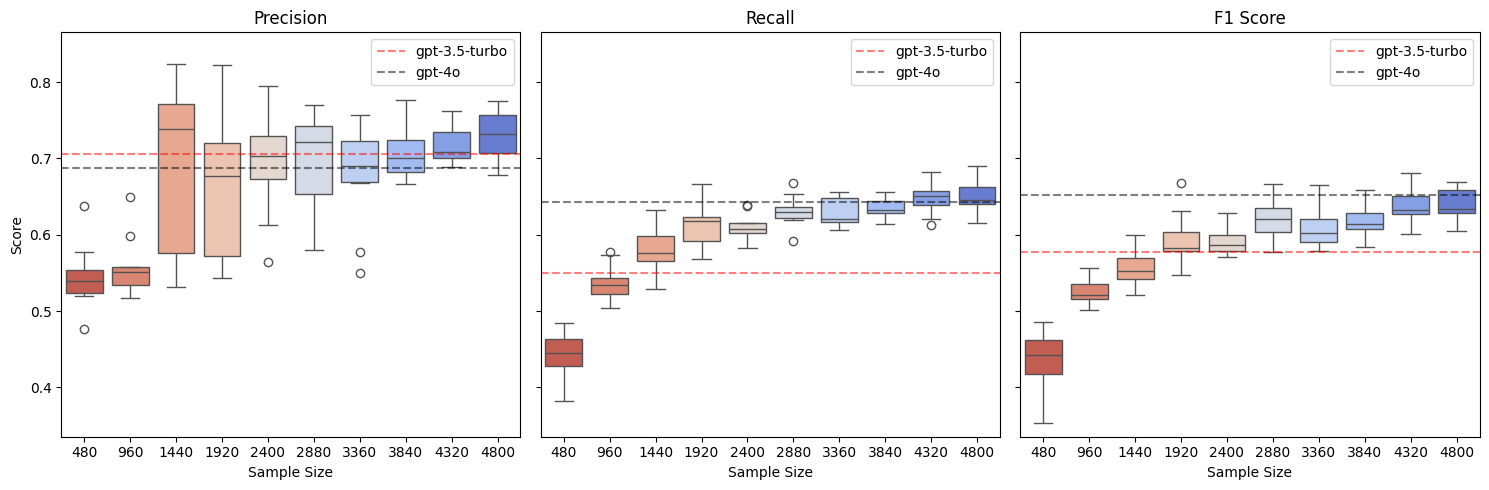

In [46]:
# Create the Box Plot Chart

# Define the y-axis limits
y_min = min(results_df["Precision"].min(), results_df["Recall"].min(), results_df["F1-Score"].min()) * 0.95  # Add buffer
y_max = max(results_df["Precision"].max(), results_df["Recall"].max(), results_df["F1-Score"].max()) * 1.05  # Add buffer

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)  # sharey=True ensures same y-scale

# Precision Boxplot
sns.boxplot(x="Sample Size", y="Precision", palette="coolwarm_r", data=results_df, ax=axes[0])
axes[0].set_title("Precision")
axes[0].set_ylim(y_min, y_max)  # Set same y-scale
axes[0].set_ylabel("Score")
gpt_3_5_turbo_precision =  0.7053890207795679 # prompt 3
gpt_4o_precision = 0.6870312454908547 # prompt 3
axes[0].axhline(y=gpt_3_5_turbo_precision, color='red', linestyle='--', linewidth=1.5, label=f"gpt-3.5-turbo", alpha=0.5) 
axes[0].axhline(y=gpt_4o_precision, color='black', linestyle='--', linewidth=1.5, label=f"gpt-4o", alpha=0.5) 
axes[0].legend()

# Recall Boxplot
sns.boxplot(x="Sample Size", y="Recall", palette="coolwarm_r", data=results_df, ax=axes[1])
axes[1].set_title("Recall")
axes[1].set_ylim(y_min, y_max)  # Set same y-scale
axes[1].set_ylabel("")
gpt_3_5_turbo_recall =  0.55 # prompt 3
gpt_4o_recall = 0.6433333333333333 # prompt 3
axes[1].axhline(y=gpt_3_5_turbo_recall, color='red', linestyle='--', linewidth=1.5, label=f"gpt-3.5-turbo", alpha=0.5) 
axes[1].axhline(y=gpt_4o_recall, color='black', linestyle='--', linewidth=1.5, label=f"gpt-4o", alpha=0.5) 
axes[1].legend()

# F1 Score Boxplot
sns.boxplot(x="Sample Size", y="F1-Score", palette="coolwarm_r", data=results_df, ax=axes[2])
axes[2].set_title("F1 Score")
axes[2].set_ylim(y_min, y_max)  # Set same y-scale
axes[2].set_ylabel("")
gpt_3_5_turbo_f1 = 0.5776322818165045 #prompt 3
gpt_4o_f1 = 0.6515936410293085 # prompt 3
axes[2].axhline(y=gpt_3_5_turbo_f1, color='red', linestyle='--', linewidth=1.5, label=f"gpt-3.5-turbo", alpha=0.5) 
axes[2].axhline(y=gpt_4o_f1, color='black', linestyle='--', linewidth=1.5, label=f"gpt-4o", alpha=0.5) 
axes[2].legend()

plt.tight_layout()
plt.show()

In [39]:
# Compute mean values for each sample size
mean_results_df = results_df.groupby("Sample Size").mean().reset_index()
mean_results_df.columns = ["Sample Size", "Mean Precision", "Mean Recall", "Mean F1-Score"]
mean_results_df

,Sample Size,Mean Precision,Mean Recall,Mean F1-Score
0,480,0.6089,0.6089,0.6089
1,960,0.6751,0.6751,0.6751
2,1440,0.7027,0.7027,0.7027
3,1920,0.7283,0.7283,0.7283
4,2400,0.7332,0.7332,0.7332
5,2880,0.7421,0.7421,0.7421
6,3360,0.7417,0.7417,0.7417
7,3840,0.7454,0.7454,0.7454
8,4320,0.7522,0.7522,0.7522
9,4800,0.7555,0.7555,0.7555


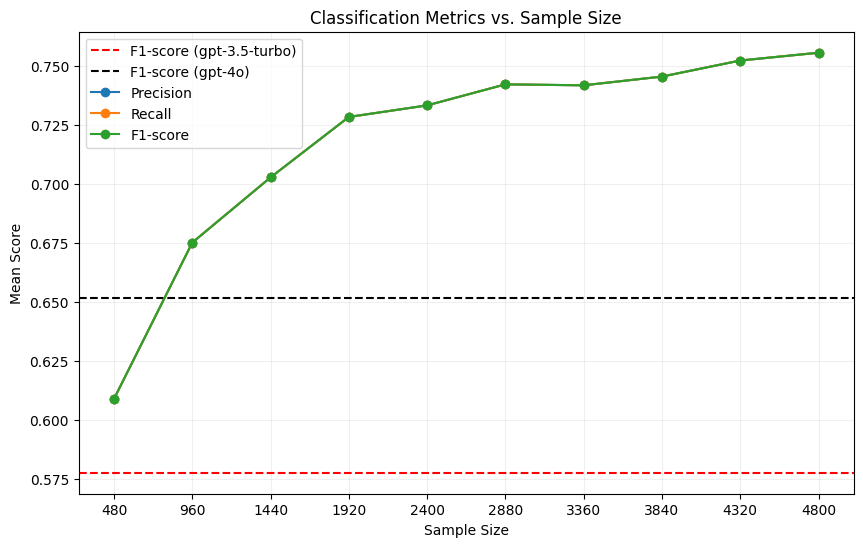

In [40]:
# Extract sample sizes and metrics
sample_sizes = mean_results_df["Sample Size"].tolist()
precision_means = mean_results_df["Mean Precision"].tolist()
recall_means = mean_results_df["Mean Recall"].tolist()
f1_means = mean_results_df["Mean F1-Score"].tolist()

# Plot the metrics
plt.figure(figsize=(10, 6))
plt.axhline(y=gpt_3_5_turbo_f1, color='red', linestyle='--', label="F1-score (gpt-3.5-turbo)")  # prompt3
plt.axhline(y=gpt_4o_f1, color='black', linestyle='--', label="F1-score (gpt-4o)")  # prompt3

# Convert sample size id to sample size num
plt.plot(sample_sizes, precision_means,  marker= 'o', label='Precision')
plt.plot(sample_sizes, recall_means, marker= 'o', label='Recall')
plt.plot(sample_sizes, f1_means, marker= 'o', label='F1-score')
plt.xticks(sample_sizes)
plt.xlabel('Sample Size')
plt.ylabel('Mean Score')
plt.title('Classification Metrics vs. Sample Size')
plt.legend()
plt.grid(True, alpha=0.2)  # Improved grid visibility
plt.show()

# Compare on Agreement - WIP

In [47]:
# Set file to analyse
file_name = "test_10_3"

# Import result
file_path = f"/home/fantoni/patent-sentence-classification/results/incremental/{file_name}.xlsx"
result_df = pd.read_excel(file_path)

# Import agreement data
agreement_df = pd.read_excel("/home/fantoni/patent-sentence-classification/data/1200_agreement_All.xlsx", usecols=['sent_id', 'agreement'])

# Merge result with agreeement data
result_df = pd.merge(result_df, agreement_df, on='sent_id', how='left')

# Indetify Correct Prediction
result_df['correct'] = result_df['sent_class'] == result_df['predicted_class']

# Get max prob
result_df["probabilities"] = result_df["probabilities"].apply(ast.literal_eval) # import as a list
result_df['max_prob'] = result_df['probabilities'].apply(max)

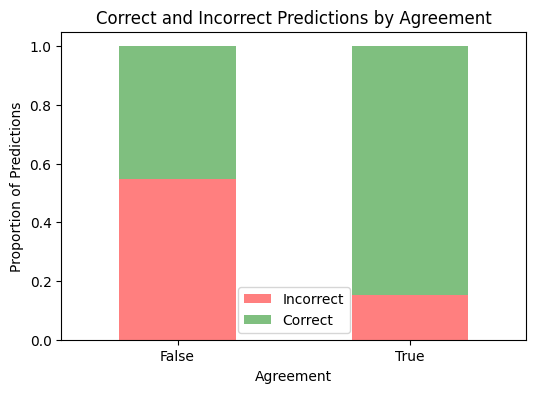

In [48]:
# Compute proportions for stacked bar chart
groups = result_df.groupby(['agreement', 'correct']).size().unstack()
proportions = groups.div(groups.sum(axis=1), axis=0)

# Plot stacked bar chart
proportions.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(6, 4), alpha=0.5)
plt.xlabel("Agreement")
plt.ylabel("Proportion of Predictions")
plt.title("Correct and Incorrect Predictions by Agreement")
plt.xticks(ticks=[0, 1], labels=['False', 'True'], rotation=0)
plt.legend(['Incorrect', 'Correct'])
plt.show()

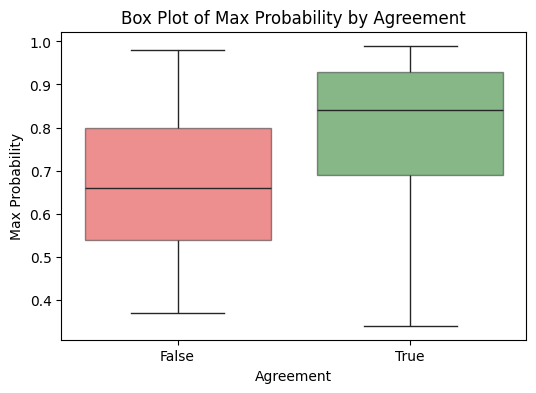

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(data=result_df, x='agreement', y='max_prob', palette={'True': 'green', 'False': 'red'}, boxprops=dict(alpha=0.5))
plt.xlabel("Agreement")
plt.ylabel("Max Probability")
plt.title("Box Plot of Max Probability by Agreement")
plt.show()

In [ ]:
import os
import pandas as pd
import ast

folder_path = "/home/fantoni/patent-sentence-classification/results/incremental"
id2num = {'1': 480, '2': 960, '3': 1440, '4': 1920, '5': 2400, '6': 2880, '7': 3360, '8': 3840, '9': 4320, '10': 4800}

# Import agreement data
agreement_df = pd.read_excel("/home/fantoni/patent-sentence-classification/data/1200_agreement_All.xlsx", usecols=['sent_id', 'agreement'])

# Process all files
results_all = []
for file_name in os.listdir(folder_path):
    if file_name.endswith(".xlsx"):
        sample_id = file_name.split('_')[1]
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_excel(file_path)

        # Merge with agreement data
        df = pd.merge(df, agreement_df, on='sent_id', how='left')

        # Compute correct predictions
        df['correct'] = df['sent_class'] == df['predicted_class']
        
        # Extract max probabilities
        df["probabilities"] = df["probabilities"].apply(ast.literal_eval) # import as a list
        df['max_prob'] = df['probabilities'].apply(max)
        
        # Collect data 
        data = {
            'Sample Size': id2num[sample_id],
            'max_prob': df['max_prob'].tolist(),
            'agreement': df['agreement'].tolist(),
            'correct': df['correct'].tolist()
        }

        results_all.append(data)

# Convert and explode DataFrame
results_df = pd.DataFrame(results_all).sort_values(by='Sample Size')
results_df = results_df.explode(['max_prob', 'agreement', 'correct']).reset_index(drop=True)
results_df

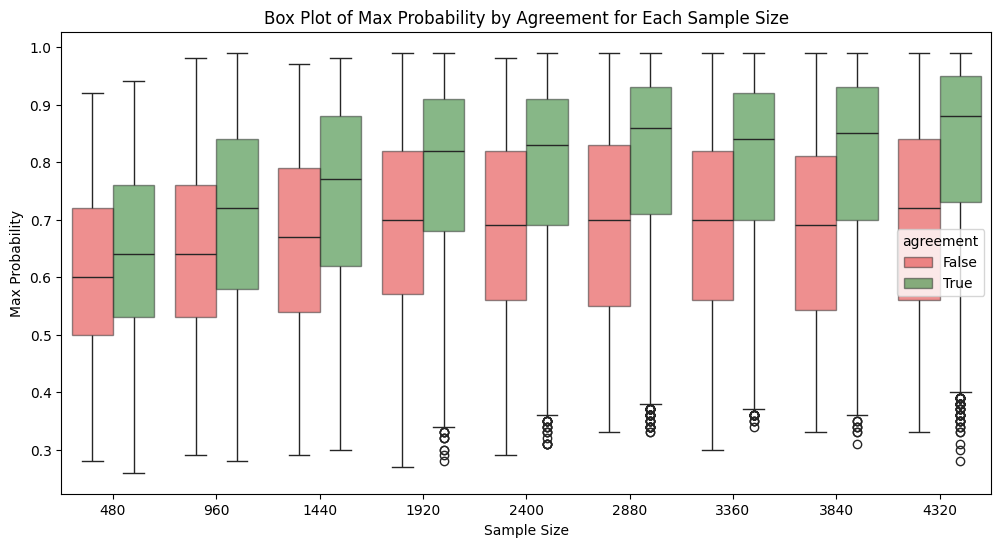

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for 'max_prob' by 'agreement', grouped by 'Sample Size'
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=results_df,
    x='Sample Size',
    y='max_prob',
    hue='agreement',
    palette={True: 'green', False: 'red'},
    boxprops=dict(alpha=0.5))
    
plt.xlabel("Sample Size")
plt.ylabel("Max Probability")
plt.title("Box Plot of Max Probability by Agreement for Each Sample Size")
plt.show()

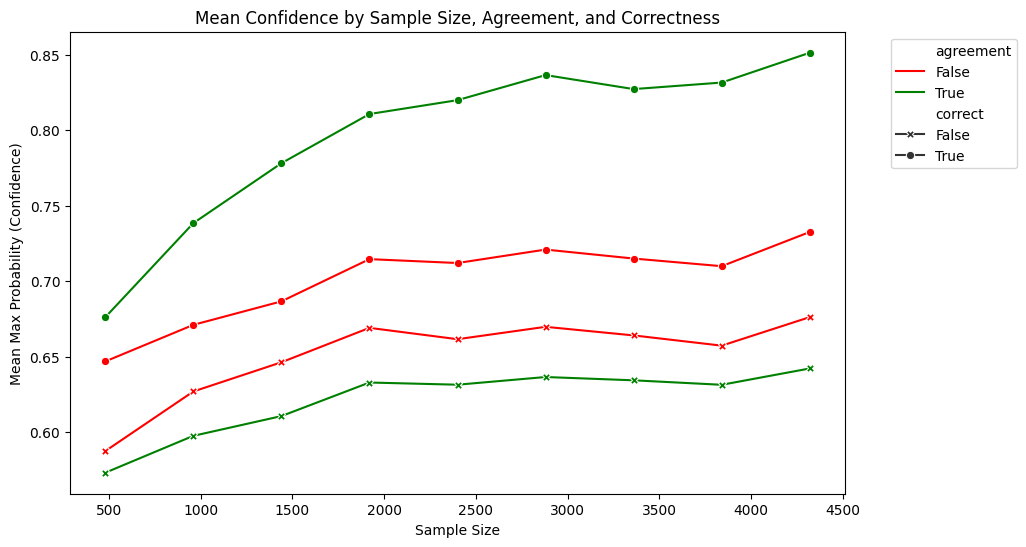

In [86]:
# Compute mean max_prob grouped by 'Sample Size' and 'Agreement' and 'Correct'
mean_df = exploded_df.groupby(['Sample Size', 'agreement', 'correct'])['max_prob'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=mean_df,
    x="Sample Size",
    y="max_prob",
    hue="agreement",
    style="correct",
    markers={True: "o", False: "X"},  # Marker style for 'correct'
    dashes=False,  # Use solid lines
    palette={True: "green", False: "red"}  # Color mapping
)

plt.xlabel("Sample Size")
plt.ylabel("Mean Max Probability (Confidence)")
plt.title("Mean Confidence by Sample Size, Agreement, and Correctness")
plt.legend(title="", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()